### Exercício 7

In [27]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, precision_score, recall_score

def classification_nested_crossvalidation(X, y, n_folds,k_folds, model, hp_grid):
    # define the external cross validation
    cv_outer = KFold(n_folds, shuffle=True)
    vauc = list()
    vprecision = list()
    vrecall = list()
    # CV external lood
    for train_out, test_out in cv_outer.split(X):
        train_x, train_y = X[train_out], y[train_out]
        test_x, test_y = X[test_out], y[test_out]
        
        # internal CV (training and validation sets)
        grid_search_cv = GridSearchCV(model, hp_grid, cv=k_folds, scoring='roc_auc', refit=True)
        
        # find the best hyperparameters
        result = grid_search_cv.fit(train_x, train_y)
        best_model = result.best_estimator_
        
        # prediction in the test fold
        pred_y = best_model.predict(test_x) 
        
        #evaluate and restore results
        fpr, tpr, threshold = metrics.roc_curve(test_y, pred_y)
        vauc.append(metrics.auc(fpr, tpr))
        vprecision.append(precision_score(test_y, pred_y, average='macro', zero_division = 0))
        vrecall.append(recall_score(test_y, pred_y, average='macro'))
        
        # examine the best model

        # Single best score achieved across all params (k)
        print('\nBest Score: ', result.best_score_)

        # Actual model object fit with those best parameters
        # Shows default parameters that we did not specify
        print('Best Estimators: ',result.best_estimator_)
        print('Best hyperparameters (extern): ', result.best_params_)
        print(classification_report(test_y, pred_y))
        print('.', end="")      
        
    print('\n')
    
    av_auc = np.mean(vauc)
    std_auc = np.std(vauc)
    av_prec = np.mean(vprecision)
    std_prec = np.std(vprecision)
    av_vrecall = np.mean(vrecall)
    std_vrecall = np.std(vrecall)
    
        
    return av_auc, std_auc, av_prec, std_prec, av_vrecall, std_vrecall, best_model

Create data

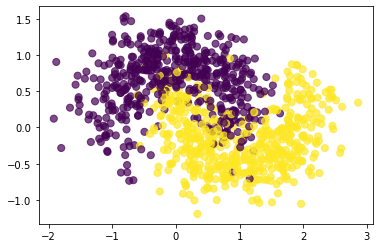

classes [0 1]


In [28]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(6,4))
n_samples = 1000
data = datasets.make_moons(n_samples=n_samples, noise=.3)
X = data[0]
y = data[1]
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.show(True)

classes = np.unique(y)
print("classes",classes)

Knn

In [35]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

n_folds = 5 # cv external folds
k_folds = 10 # cv internal folds (training set)

k_range = list(range(1, 32))
weight_options = ['uniform', 'distance']
metric_options = ['euclidean', 'manhattan' , 'chebyshev', 'minkowski']

# create a parameter grid: map the parameter names to the values that should be searched
parameters = dict(n_neighbors=k_range, weights=weight_options, metric=metric_options)
print(parameters)

model = KNeighborsClassifier()
av_auc, std_auc, av_prec, std_prec, av_vrecall, std_recall, best_model = classification_nested_crossvalidation(X, y, n_folds, 
                                                       k_folds, model, parameters)
print('AUC:', av_auc, 'std:', std_auc)
print('Precision:', av_prec, 'std:', std_prec)
print('Recall:', av_vrecall, 'std:', std_recall)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}

Best Score:  0.9742734326141338
Best Estimators:  KNeighborsClassifier(metric='chebyshev', n_neighbors=29)
Best hyperparameters (extern):  {'metric': 'chebyshev', 'n_neighbors': 29, 'weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       104
           1       0.95      0.91      0.93        96

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200

.
Best Score:  0.9741863273921201
Best Estimators:  KNeighborsClassifier(metric='chebyshev', n_neighbors=28)
Best hyperparameters (extern):  {'metric': 'chebyshev', 'n_neighbors': 28, 'weights': 'uniform'}
              precision    re

Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier

n_fold = 5 #cv folds externos
k_folds = 10 # vc folds internos

parameters = {    
    'n_estimators':[10,50,100,150,200],
    'max_depth':[5,7,10,15,20],
    'max_features':['auto','sqrt','log2'],
    'criterion':['gini','entropy']
}

model = RandomForestClassifier()
av_auc, std_auc, av_prec, std_prec, av_vrecall, std_recall, best_model = classification_nested_crossvalidation(X, y, n_folds, k_folds, model, parameters)

print('AUC:', av_auc, 'std:', std_auc)
print('Precision:', av_prec, 'std:', std_prec)
print('Recall:', av_vrecall, 'std:', std_recall)


Best Score:  0.9713064024390243
Best Estimators:  RandomForestClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       n_estimators=50)
Best hyperparameters (extern):  {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       102
           1       0.88      0.88      0.88        98

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200

.
Best Score:  0.963410049514029
Best Estimators:  RandomForestClassifier(criterion='entropy', max_depth=7, max_features='sqrt',
                       n_estimators=200)
Best hyperparameters (extern):  {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.90      0.93      0.92 

Arvore de Decisao

In [32]:
from sklearn.tree import DecisionTreeClassifier

n_fold = 5 #cv folds externos
k_folds = 10 # vc folds internos


parameters = {    
    'max_depth':[5,7,10,15,20],
    'max_features':['auto','sqrt','log2'],
    'criterion':['gini','entropy'],
    'max_leaf_nodes': [5,7,10,15,20], 
    'min_samples_split': [5,7,10]
}

model = DecisionTreeClassifier()
av_auc, std_auc, av_prec, std_prec, av_vrecall, std_recall, best_model = classification_nested_crossvalidation(X, y, n_folds, k_folds, model, parameters)

print('AUC:', av_auc, 'std:', std_auc)
print('Precision:', av_prec, 'std:', std_prec)
print('Recall:', av_vrecall, 'std:', std_recall)


Best Score:  0.954246501719825
Best Estimators:  DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='sqrt',
                       max_leaf_nodes=15, min_samples_split=5)
Best hyperparameters (extern):  {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': 15, 'min_samples_split': 5}
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        98
           1       0.93      0.86      0.89       102

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.89       200
weighted avg       0.90      0.90      0.89       200

.
Best Score:  0.948609404315197
Best Estimators:  DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='sqrt',
                       max_leaf_nodes=15, min_samples_split=5)
Best hyperparameters (extern):  {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': 15, 'min_samples_split': 5}


Bagginng 

In [60]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

n_fold = 5 #cv folds externos
k_folds = 10 # vc folds internos


parameters = {
    'max_samples' : [0.05, 0.1, 0.2, 0.5]
    
}

# model = GridSearchCV(BaggingClassifier(DecisionTreeClassifier('criterion': 'entropy', 'max_depth': 15, 'max_features': 'auto', 'max_leaf_nodes': 20), 
#                                        n_estimators = 100, max_features = 0.5),
#                      parameters, scoring = choosen_scoring)


param_grid = {
    'max_samples' : [0.05, 0.1, 0.2, 0.5]
}

# clf = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(),
#                                      n_estimators = 100, max_features = 0.5
#                    param_grid, scoring ='roc_auc')

model = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 100, max_features = 0.5)

av_auc, std_auc, av_prec, std_prec, av_vrecall, std_recall, best_model = classification_nested_crossvalidation(X, y, n_folds, k_folds, model, parameters)

print('AUC:', av_auc, 'std:', std_auc)
print('Precision:', av_prec, 'std:', std_prec)
print('Recall:', av_vrecall, 'std:', std_recall)


Best Score:  0.9436128830519074
Best Estimators:  BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_features=0.5,
                  max_samples=0.05, n_estimators=100)
Best hyperparameters (extern):  {'max_samples': 0.05}
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       103
           1       0.81      0.86      0.83        97

    accuracy                           0.83       200
   macro avg       0.84      0.84      0.83       200
weighted avg       0.84      0.83      0.84       200

.
Best Score:  0.9377168933708567
Best Estimators:  BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_features=0.5,
                  max_samples=0.05, n_estimators=100)
Best hyperparameters (extern):  {'max_samples': 0.05}
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       108
           1       0.91      0.89      0.90        92

    accuracy                        

RandonForest \\
AUC: 0.9069200908310968 std: 0.02027991657458699\\
Precision: 0.9067036877627702 std: 0.020065971964062835\\
Recall: 0.9069200908310968 std: 0.020279916574586974\\

Bagging
AUC: 0.8688141979955872 std: 0.03685030753553256
Precision: 0.8689971466442055 std: 0.037552594041096066
Recall: 0.8688141979955872 std: 0.03685030753553252

Arvores_Decisao
AUC: 0.8677266665775623 std: 0.020799469712139834
Precision: 0.8716857379004445 std: 0.017873850103465566
Recall: 0.8677266665775623 std: 0.020799469712139838


In [11]:
import pandas as pd
import numpy as np
from collections import OrderedDict
data = {
'Modelo': ['RandonForest', 'Bagging', 'Arvores_Decisao'],
'AUC': [0.9069, 0.8688, 0.8677],
'AUC_Std': [0.02, 0.0368, 0.02],
'Precision': [0.9067, 0.8689, 0.8716],
'Precision_Std': [0.02, 0.0375, 0.0178],
'Recall': [0.9069,  0.8688, 0.8677],
'Recall_std': [0.02, 0.0368, 0.020]
}

print('Randon forest apresentou os melhores resultados na avaliação dos modelos')
df = pd.DataFrame(data, index=[1,3,2]).sort_index()
df


Randon forest apresentou os melhores resultados na avaliação dos modelos


,Modelo,AUC,AUC_Std,Precision,Precision_Std,Recall,Recall_std
1,RandonForest,0.9069,0.0200,0.9067,0.0200,0.9069,0.0200
2,Arvores_Decisao,0.8677,0.0200,0.8716,0.0178,0.8677,0.0200
3,Bagging,0.8688,0.0368,0.8689,0.0375,0.8688,0.0368


### Exercício 8

falta fazer o Bagging, regressao logistica, Naive Bayes e criar tabela